+-------------------+----------+------------+
| Model             |     RMSE |   R² Score |
+===================+==========+============+
| Linear Regression | 1.29479  |   0.263445 |
+-------------------+----------+------------+
| Decision Tree     | 0.451976 |   0.910249 |
+-------------------+----------+------------+
| Random Forest     | 0.366079 |   0.941122 |
+-------------------+----------+------------+
Comparison of Linear Regression, Decision Tree, and Random Forest models completed.
Results saved to model_results.txt

Customer Preference Analysis
Most Popular Cuisines based on Votes:
 Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

Cuisines with Highest Average Ratings:
 Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         

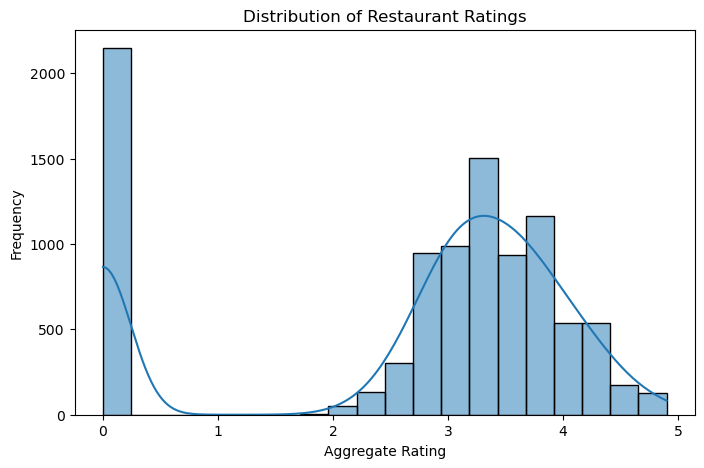

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_3106/3019794060.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="viridis")


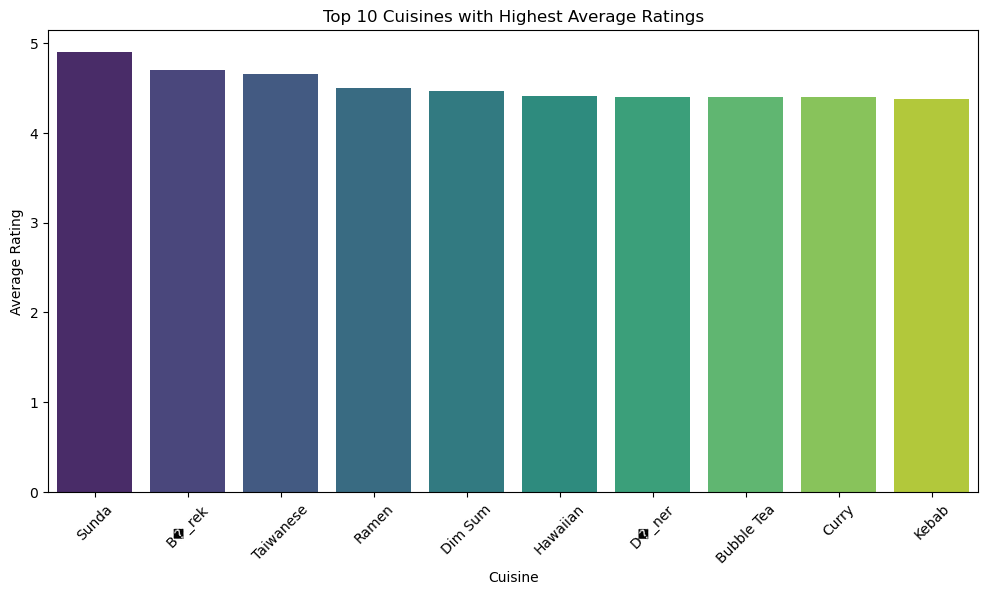

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_3106/3019794060.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="coolwarm")


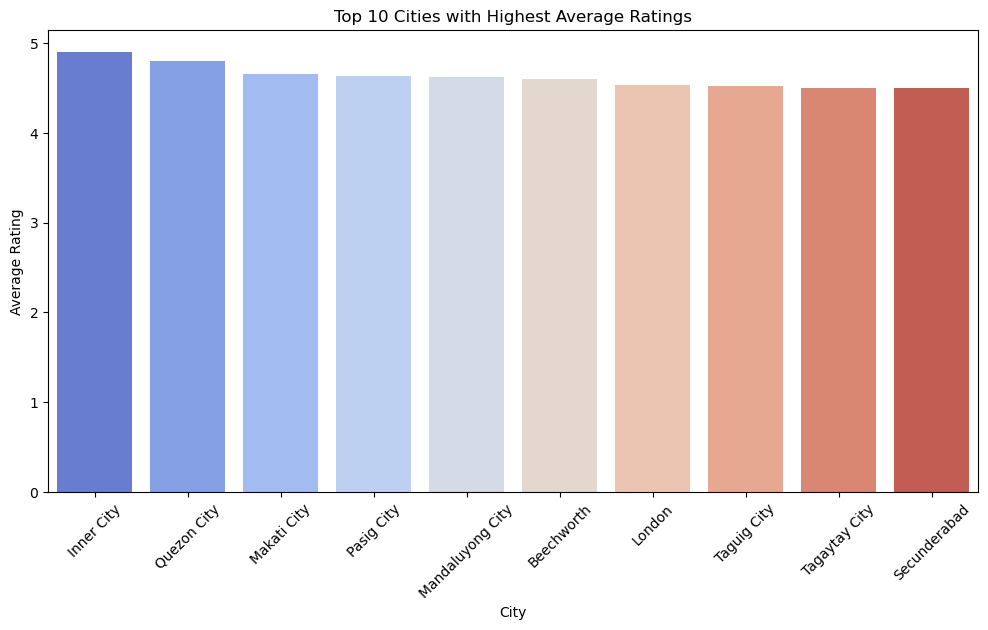

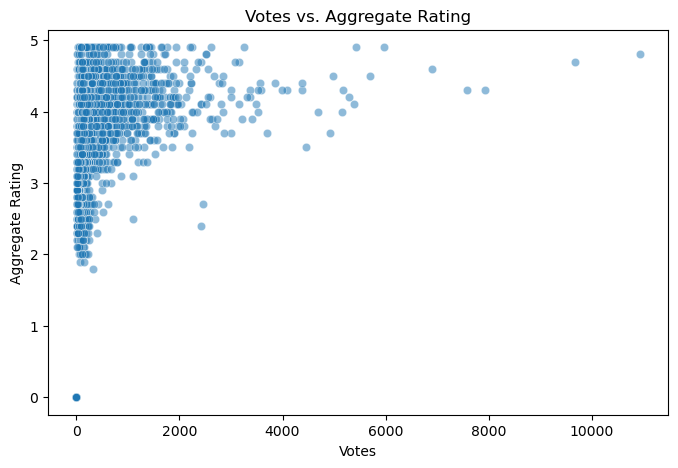

Data visualizations generated and saved successfully.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tabulate import tabulate

# Load the dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)

# Selecting relevant features for prediction
features = ["Average Cost for two", "Price range", "Votes", "Has Table booking", "Has Online delivery"]
target = "Aggregate rating"

# Encoding categorical variables
df_encoded = df[features + [target]].copy()
df_encoded["Has Table booking"] = df_encoded["Has Table booking"].map({"Yes": 1, "No": 0})
df_encoded["Has Online delivery"] = df_encoded["Has Online delivery"].map({"Yes": 1, "No": 0})

# Dropping rows with missing target values
df_encoded = df_encoded.dropna()

# Splitting the dataset into training and testing sets
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Training and evaluating models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, r2])

# Creating a tabulated output
results_table = tabulate(results, headers=["Model", "RMSE", "R² Score"], tablefmt="grid")

# Save results to a text file
results_file_path = "model_results.txt"
with open(results_file_path, "w") as f:
    f.write(results_table)

print(results_table)
print("Comparison of Linear Regression, Decision Tree, and Random Forest models completed.")
print(f"Results saved to {results_file_path}")

# Customer Preference Analysis
print("\nCustomer Preference Analysis")

# Analyzing the relationship between cuisine type and restaurant rating
df_cuisine = df[['Cuisines', 'Aggregate rating', 'Votes']].dropna()

# Splitting multiple cuisines and normalizing
df_cuisine = df_cuisine.assign(Cuisines=df_cuisine['Cuisines'].str.split(', ')).explode('Cuisines')

# Identifying the most popular cuisines based on votes
popular_cuisines = df_cuisine.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Determining cuisines that receive higher ratings
high_rated_cuisines = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Displaying results
print("Most Popular Cuisines based on Votes:\n", popular_cuisines.head(10))
print("\nCuisines with Highest Average Ratings:\n", high_rated_cuisines.head(10))

# Data Visualization
print("\nGenerating Data Visualizations...")

# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.savefig("rating_distribution.png")
plt.show()

# Average Ratings of Different Cuisines
plt.figure(figsize=(12, 6))
top_cuisines = high_rated_cuisines.head(10)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Cuisines with Highest Average Ratings")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.savefig("top_cuisines_ratings.png")
plt.show()

# Average Ratings by City
if 'City' in df.columns:
    city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title("Top 10 Cities with Highest Average Ratings")
    plt.xlabel("City")
    plt.ylabel("Average Rating")
    plt.savefig("top_cities_ratings.png")
    plt.show()

# Relationship between Votes and Ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], alpha=0.5)
plt.title("Votes vs. Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.savefig("votes_vs_ratings.png")
plt.show()

print("Data visualizations generated and saved successfully.")